# Bacalaureat 2024

In [1]:
import pandas as pd
import numpy as np

In [2]:
date_vara = pd.read_csv("data/bac2024_vara.csv")
date_toamna = pd.read_csv("data/bac2024_toamna.csv")

# print(data.head())

# print(data.isnull().sum())

## Sesiunea iunie-iulie

In [3]:
candidati_reusit = date_vara[date_vara['Rezultatul Final'] == 'REUSIT'].shape[0]
print(f"Numar candidati care au luat bacul: {candidati_reusit}")

Numar candidati care au luat bacul: 101731


In [4]:
candidati_respins = date_vara[date_vara['Rezultatul Final'] == 'RESPINS'].shape[0]
print(f"Numar candidati care au picat bacul: {candidati_respins}")

Numar candidati care au picat bacul: 28206


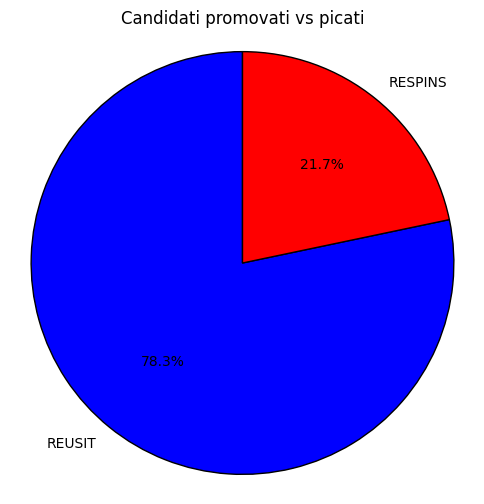

In [5]:
import matplotlib.pyplot as plt

labels = ['REUSIT', 'RESPINS']
colors = ["blue", "red"]

reusit = date_vara[date_vara["Rezultatul Final"] == "REUSIT"].shape[0]
respins = date_vara[date_vara["Rezultatul Final"] == "RESPINS"].shape[0]
total = len(date_vara['Nr. crt.'])
sizes = [reusit/total*100, respins/total*100]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"},
)
plt.axis('equal')
plt.title('Candidati promovati vs picati')
plt.show()

In [6]:
contestatii_totale = (
    date_vara[
        [
            "Romana-Contestatie",
            "Limba materna-Contestatie",
            "DiscOblig-Contestatie",
            "DiscAlegere-Contestatie",
        ]
    ]
    .notna()
    .sum()
    .sum()
)
print(f"S-au depus {contestatii_totale} contestatii in total.")

S-au depus 51374 contestatii in total.


In [7]:
contestatii_castigate = 0

column_pairs = [
    ("Romana-Scris", "Romana-Contestatie"),
    ("Limba materna-Scris", "Limba materna-Contestatie"),
    ("DiscOblig-Nota", "DiscOblig-Contestatie"),
    ("DiscAlegere-Nota", "DiscAlegere-Contestatie"),
]

for col1, col2 in column_pairs:
    for row1, row2 in zip(date_vara[col1], date_vara[col2]):
        if not pd.isna(row1) and not pd.isna(row2) and row1 < row2:
            contestatii_castigate += 1

print(f"Au fost castigate {contestatii_castigate} contestatii.")

Au fost castigate 31255 contestatii.


In [8]:
contestatii_pierdute = 0

column_pairs = [
    ("Romana-Scris", "Romana-Contestatie"),
    ("Limba materna-Scris", "Limba materna-Contestatie"),
    ("DiscOblig-Nota", "DiscOblig-Contestatie"),
    ("DiscAlegere-Nota", "DiscAlegere-Contestatie"),
]

for col1, col2 in column_pairs:
    for row1, row2 in zip(date_vara[col1], date_vara[col2]):
        if not pd.isna(row1) and not pd.isna(row2) and row1 > row2:
            contestatii_pierdute += 1

print(f"Au fost pierdute {contestatii_pierdute} contestatii.")

Au fost pierdute 17643 contestatii.


In [9]:
contestatii_nule = 0

column_pairs = [
    ("Romana-Scris", "Romana-Contestatie"),
    ("Limba materna-Scris", "Limba materna-Contestatie"),
    ("DiscOblig-Nota", "DiscOblig-Contestatie"),
    ("DiscAlegere-Nota", "DiscAlegere-Contestatie"),
]

for col1, col2 in column_pairs:
    for row1, row2 in zip(date_vara[col1], date_vara[col2]):
        if not pd.isna(row1) and not pd.isna(row2) and row1 == row2:
            contestatii_nule += 1

print(f"Contestatii fara rezultat: {contestatii_nule}.")

Contestatii fara rezultat: 2476.


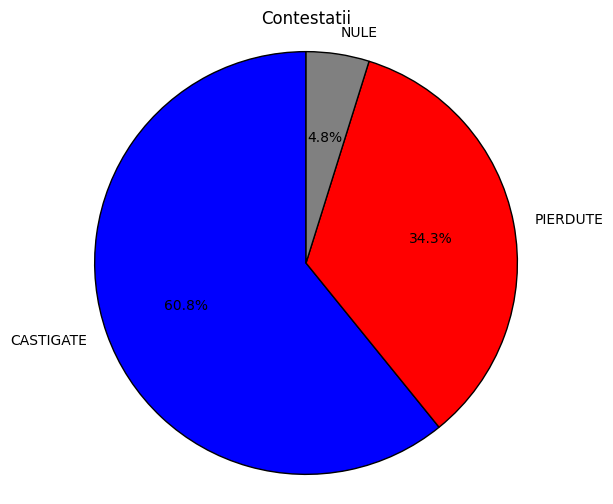

In [10]:
labels = ["CASTIGATE", "PIERDUTE", "NULE"]
colors = ["blue", "red", "grey"]


total = 51374
castigate = 31255
pierdute = 17643
nule = 2476
sizes = [castigate / total * 100, pierdute / total * 100, nule/total*100]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"},
)
plt.axis("equal")
plt.title("Contestatii")
plt.show()

In [11]:
punctaje_castigate_romana = (
    date_vara[date_vara["Romana-Contestatie"] > date_vara["Romana-Scris"]][
        "Romana-Contestatie"
    ]
    - date_vara["Romana-Scris"]
)
punctaje_castigate_limba_materna = (
    date_vara[
        date_vara["Limba materna-Contestatie"] > date_vara["Limba materna-Scris"]
    ]["Limba materna-Contestatie"]
    - date_vara["Limba materna-Scris"]
)
punctaje_castigate_disc_oblig = (
    date_vara[date_vara["DiscOblig-Contestatie"] > date_vara["DiscOblig-Nota"]][
        "DiscOblig-Contestatie"
    ]
    - date_vara["DiscOblig-Nota"]
)
punctaje_castigate_disc_alegere = (
    date_vara[date_vara["DiscAlegere-Contestatie"] > date_vara["DiscAlegere-Nota"]][
        "DiscAlegere-Contestatie"
    ]
    - date_vara["DiscAlegere-Nota"]
)

punctaje_castigate = pd.concat(
    [
        punctaje_castigate_romana,
        punctaje_castigate_limba_materna,
        punctaje_castigate_disc_oblig,
        punctaje_castigate_disc_alegere,
    ]
)

punctaj_max_castigat = punctaje_castigate.max()
punctaj_min_castigat = punctaje_castigate.min()

print(f"Punctaj maxim la contestațiile câștigate: {punctaj_max_castigat}")
print(f"Punctaj minim la contestațiile câștigate: {punctaj_min_castigat}")

Punctaj maxim la contestațiile câștigate: 6.85
Punctaj minim la contestațiile câștigate: 0.049999999999998934


In [12]:
punctaje_pierdute_romana = (
    date_vara[date_vara["Romana-Contestatie"] < date_vara["Romana-Scris"]][
        "Romana-Contestatie"
    ]
    - date_vara["Romana-Scris"]
)
punctaje_pierdute_limba_materna = (
    date_vara[
        date_vara["Limba materna-Contestatie"] < date_vara["Limba materna-Scris"]
    ]["Limba materna-Contestatie"]
    - date_vara["Limba materna-Scris"]
)
punctaje_pierdute_disc_oblig = (
    date_vara[date_vara["DiscOblig-Contestatie"] < date_vara["DiscOblig-Nota"]][
        "DiscOblig-Contestatie"
    ]
    - date_vara["DiscOblig-Nota"]
)
punctaje_pierdute_disc_alegere = (
    date_vara[date_vara["DiscAlegere-Contestatie"] < date_vara["DiscAlegere-Nota"]][
        "DiscAlegere-Contestatie"
    ]
    - date_vara["DiscAlegere-Nota"]
)

punctaje_pierdute = pd.concat(
    [
        punctaje_pierdute_romana,
        punctaje_pierdute_limba_materna,
        punctaje_pierdute_disc_oblig,
        punctaje_pierdute_disc_alegere,
    ]
)

punctaj_max_pierdut = punctaje_pierdute.min()
punctaj_min_pierdut = punctaje_pierdute.max()

print(f"Punctaj maxim la contestațiile pierdute: {punctaj_max_pierdut}")
print(f"Punctaj minim la contestațiile pierdute: {punctaj_min_pierdut}")

Punctaj maxim la contestațiile pierdute: -2.5
Punctaj minim la contestațiile pierdute: -0.049999999999998934
